# Consumer Transformation

This notebook uses generated .csv files (buses, generators, links, loads, storage_units) as input and run optimization using Gurobi solver. Note: the input files are being read from '1a-LOPF' folder, where generated .csv files by data reader writer notebooks (from PyPSA-GB-H2\data...) are placed.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)
os.getcwd()

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

In [3]:
# import csv files

network = pypsa.Network()
network.import_from_csv_folder('1a-LOPF')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network 1a-LOPF has buses, generators, links, loads, storage_units


In [4]:
# running the optimisation

network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 8.29s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-11
Read LP format model from file C:\Users\tatya\AppData\Local\Temp\pypsa-problem-5ga5untk.lp
Reading time = 4.24 seconds
obj: 1752000 rows, 788419 columns, 2917080 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1752000 rows, 788419 columns and 2917080 nonzeros
Model fingerprint: 0x1e94cc2e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 7e+03]
Presolve removed 1743240 rows and 718339 columns
Presolve time: 1.05s
Presolved: 8760 rows, 70080 columns, 78840 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA'

INFO:pypsa.linopf:Optimization successful. Objective value: -7.46e+07


('ok', 'optimal')

## 1. Plot Generators

### 1.1 Plot graphs (supply by sector)

In [5]:
# Group the generators by the type, and print their summed power outputs over the simulation period
p_by_carrier = network.generators_t.p.groupby(
    network.generators.type, axis=1).sum()
p_by_carrier

type,Biomass gasification,Imports,Methane Reformation with CCUS,Networked Electrolysis,Non-networked Electrolysis,Nuclear Electrolysis
snapshot,,,,,,
2050-01-01 00:00:00,0.0,0.0,142.266425,22950.865613,558.156844,913.242008
2050-01-01 01:00:00,0.0,0.0,142.266425,22981.944954,594.803376,913.242008
2050-01-01 02:00:00,0.0,0.0,142.266425,23015.750277,605.321544,913.242008
2050-01-01 03:00:00,0.0,0.0,142.266425,23071.915448,608.984444,913.242008
2050-01-01 04:00:00,0.0,0.0,142.266425,23038.702541,593.915204,913.242008
...,...,...,...,...,...,...
2050-12-31 19:00:00,0.0,0.0,142.266425,22443.988874,389.676852,913.242008
2050-12-31 20:00:00,0.0,0.0,142.266425,22136.483716,369.599680,913.242008
2050-12-31 21:00:00,0.0,0.0,142.266425,21191.081560,349.507112,913.242008


In [6]:
p_by_carrier.values.sum() / 1e6

113.12131622241402

In [7]:
p_by_carrier['Methane Reformation with CCUS'].values.sum() / 1e6

1.2462538829999998

In [8]:
p_by_carrier['Networked Electrolysis'].values.sum() / 1e6

101.98890489715203

In [9]:
p_by_carrier['Non-networked Electrolysis'].values.sum() / 1e6

1.8861574521820004

In [10]:
p_by_carrier['Biomass gasification'].values.sum() / 1e6

0.0

In [11]:
p_by_carrier['Nuclear Electrolysis'].values.sum() / 1e6

7.999999990079998

In [12]:
p_by_carrier['Imports'].values.sum() / 1e6

0.0

In [13]:
# p_by_carrier.to_csv('1a-output\p_supply-by-sector.csv', index=True)

### 1.2 Plot graphs

In [14]:
import matplotlib.patches as mpatches

Text(0.5, 0, '')

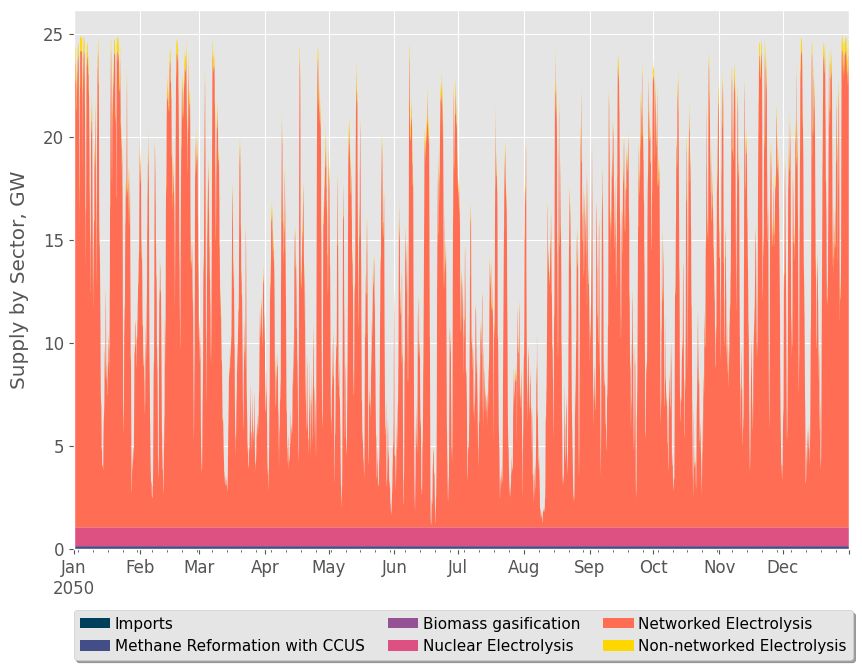

In [15]:
# Graph hydrogen output of the different generation types
cols = ['Imports','Methane Reformation with CCUS', 'Biomass gasification', 'Nuclear Electrolysis', 'Networked Electrolysis',
        'Non-networked Electrolysis']

plt.rcParams.update({'font.size': 12})

p_by_carrier = p_by_carrier[cols]

colors = {'Methane Reformation with CCUS': '#444e86',
          'Biomass gasification': '#955196',
          'Nuclear Electrolysis': '#dd5182',
          'Networked Electrolysis': '#ff6e54',
          'Non-networked Electrolysis': '#FFD700',
          'Imports': '#003f5c'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(-0.01, -0.1),
          fancybox=True, shadow=True, ncol=3, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Supply by Sector, GW", labelpad=10)

ax.set_xlabel("")

## 2. Plot Demand

### 2.1 Plot graphs (demand by cluster)

In [16]:
# Print loads by their hydrogen consumption over the simulation period
p_by_cluster = network.loads_t.p
p_by_cluster

Load,St Fergus,Grangemouth,Teesside,Humberside,Theddlethorpe,Merseyside,Barrow,Bacton,Grain LNG,Southampton,South Wales
snapshot,,,,,,,,,,,
2050-01-01 00:00:00,1844.821889,2007.429787,1944.412861,2384.912595,69.002349,227.822986,0.0,1883.922545,100.376231,50.755758,92.127799
2050-01-01 01:00:00,1844.676486,2007.090513,1943.996873,2384.483522,68.433244,226.777761,0.0,1883.581253,99.707426,50.389677,91.548144
2050-01-01 02:00:00,1846.014199,2010.211844,1947.823981,2388.431019,73.669036,236.393873,0.0,1886.721151,105.860459,53.757635,96.881003
2050-01-01 03:00:00,1848.369733,2015.708090,1954.563005,2395.382031,82.888563,253.326555,0.0,1892.250090,116.695123,59.688156,106.271453
2050-01-01 04:00:00,1850.899754,2021.611472,1961.801225,2402.847942,92.791030,271.513533,0.0,1898.188588,128.332369,66.057983,116.357505
...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 19:00:00,1845.757181,2013.431284,1949.081647,2401.874194,72.150912,235.965309,0.0,1885.810734,104.076379,52.781091,95.344070
2050-12-31 20:00:00,1845.142396,2011.996786,1947.322788,2400.060007,69.744652,231.545946,0.0,1884.367703,101.248575,51.233249,92.893200
2050-12-31 21:00:00,1843.939560,2009.190168,1943.881555,2396.510524,65.036768,222.899396,0.0,1881.544390,95.715933,48.204871,88.098035


In [17]:
p_by_cluster.values.sum() / 1e6

113.12131622249998

In [18]:
# p_by_cluster.to_csv('1a-output\p_demand-by-cluster.csv', index=True)

Text(0.5, 0, '')

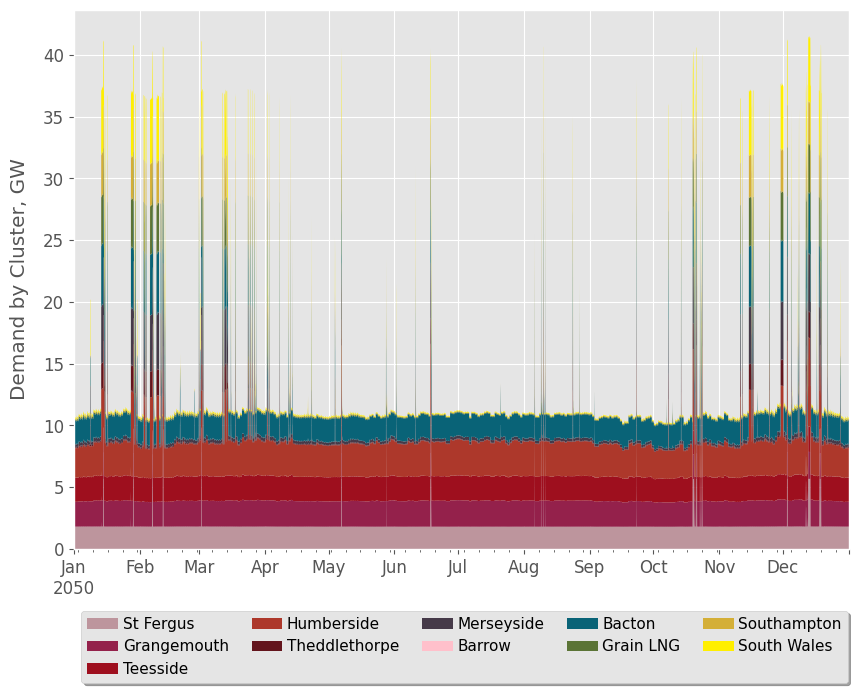

In [19]:
# Graph the hydrogen demand by clusters
cols = ['St Fergus', 'Grangemouth','Teesside', 'Humberside', 'Theddlethorpe', 'Merseyside', 
        'Barrow', 'Bacton', 'Grain LNG', 'Southampton', 'South Wales']

plt.rcParams.update({'font.size': 12})

p_by_cluster = p_by_cluster[cols]

colors = {'St Fergus': '#BD959D',
          'Grangemouth': '#94214B',
          'Teesside': '#9E0F1E',
          'Humberside': '#AD382B',
          'Theddlethorpe': '#63141C',
          'Merseyside': '#463A49',
          'Barrow': 'pink',
          'Bacton': '#096377',
          'Grain LNG': '#5B7436',
          'Southampton': '#D4AF37',
          'South Wales': '#FFEF00'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
(p_by_cluster / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_cluster.columns])

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(0, -0.1),
          fancybox=True, shadow=True, ncol=5, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Demand by Cluster, GW", labelpad=10)

ax.set_xlabel("")

### 2.2 Plot graphs (demand by sector)

In [20]:
# read demand by sector folder:
path = '1a-LOPF\demand_input'

In [21]:
# heating
df_heating = pd.read_csv(path+'\h2-heating.csv')
df_heating = df_heating.set_index(['name'])
df_heating['Heating (Residential + Commercial)']=df_heating.iloc[:, 0:10].sum(axis=1)
df_heating = df_heating.filter(['Heating (Residential + Commercial)'], axis=1)

# industy
df_industry = pd.read_csv(path+'\h2-industrial.csv')
df_industry = df_industry.set_index(['name'])
df_industry['Industry']=df_industry.iloc[:, 0:10].sum(axis=1)
df_industry = df_industry.filter(['Industry'], axis=1)

# power generation
df_power = pd.read_csv(path+'\h2-power.csv')
df_power = df_power.set_index(['name'])
df_power['Power Generation']=df_power.iloc[:, 0:10].sum(axis=1)
df_power = df_power.filter(['Power Generation'], axis=1)

# road transport
df_transport = pd.read_csv(path+'\h2-transport.csv')
df_transport = df_transport.set_index(['name'])
df_transport['Road Transport']=df_transport.iloc[:, 0:10].sum(axis=1)
df_transport = df_transport.filter(['Road Transport'], axis=1)

# shipping and aviation (synthetic fuels)
df_fuels = pd.read_csv(path+'\h2-synthetic-fuels.csv')
df_fuels = df_fuels.set_index(['name'])
df_fuels['Synthetic Fuels']=df_fuels.iloc[:, 0:10].sum(axis=1)
df_fuels = df_fuels.filter(['Synthetic Fuels'], axis=1)

# exports
df_exports = pd.read_csv(path+'\h2-daccs.csv')
df_exports = df_exports.set_index(['name'])
df_exports['DACCS']=df_exports.iloc[:, 0:10].sum(axis=1)
df_exports = df_exports.filter(['DACCS'], axis=1)


df_demand = pd.concat([df_heating, df_industry, df_power, df_transport, df_fuels, df_exports], ignore_index=False, axis=1)

Text(0.5, 0, '')

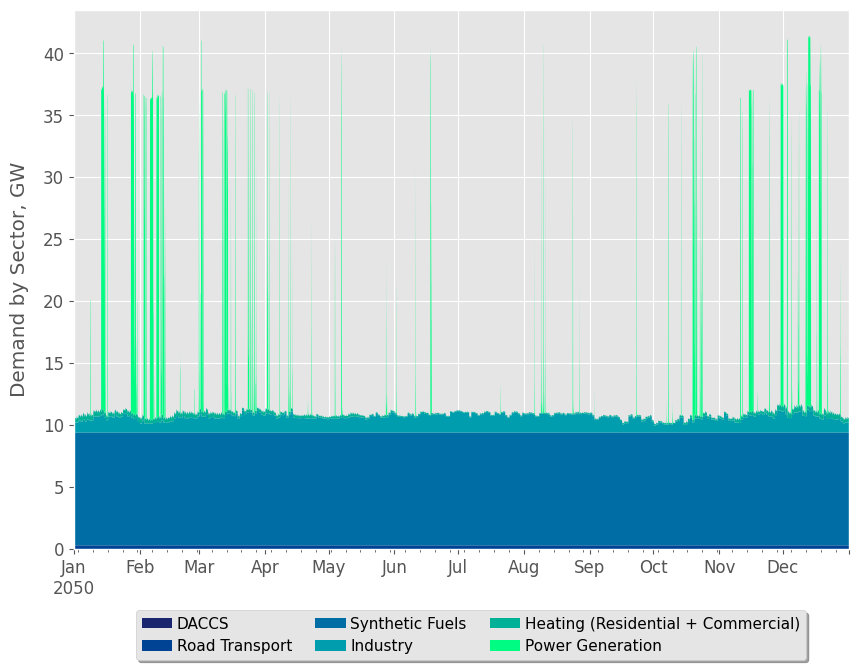

In [22]:
# Graph the hydrogen demand by sectors
cols = ['DACCS','Road Transport','Synthetic Fuels','Industry','Heating (Residential + Commercial)','Power Generation']

plt.rcParams.update({'font.size': 12})

df_demand = df_demand[cols]

df_demand.index = pd.to_datetime(df_demand.index)

colors = {'Heating (Residential + Commercial)': '#00B198',
          'Industry': '#009DAE',
          'Power Generation': '#00FC82',
          'Road Transport': '#004394',
          'Synthetic Fuels': '#006EA5',
          'DACCS': '#1A266D'}

fig, ax = plt.subplots()    
fig.set_size_inches(10,7)
(df_demand / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in df_demand.columns])

ax.margins(x=0)

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(0.07, -0.1),
          fancybox=True, shadow=True, ncol=3, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Demand by Sector, GW", labelpad=10)

ax.set_xlabel("")

In [23]:
# df_demand.to_csv('1a-output\p_demand-by-sector.csv', index=True)

## 3. Plot Storage

In [24]:
# Group the storage, and print their summed state of charge over the simulation period
p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
state_of_charge

snapshot
2050-01-01 00:00:00    4.523240e+06
2050-01-01 01:00:00    4.537271e+06
2050-01-01 02:00:00    4.551302e+06
2050-01-01 03:00:00    4.565313e+06
2050-01-01 04:00:00    4.579191e+06
                           ...     
2050-12-31 19:00:00    4.463205e+06
2050-12-31 20:00:00    4.476131e+06
2050-12-31 21:00:00    4.488132e+06
2050-12-31 22:00:00    4.498861e+06
2050-12-31 23:00:00    4.509281e+06
Length: 8760, dtype: float64

In [25]:
# state_of_charge.to_csv('1a-output\p_storage.csv', index=True)

Text(0.5, 0, '')

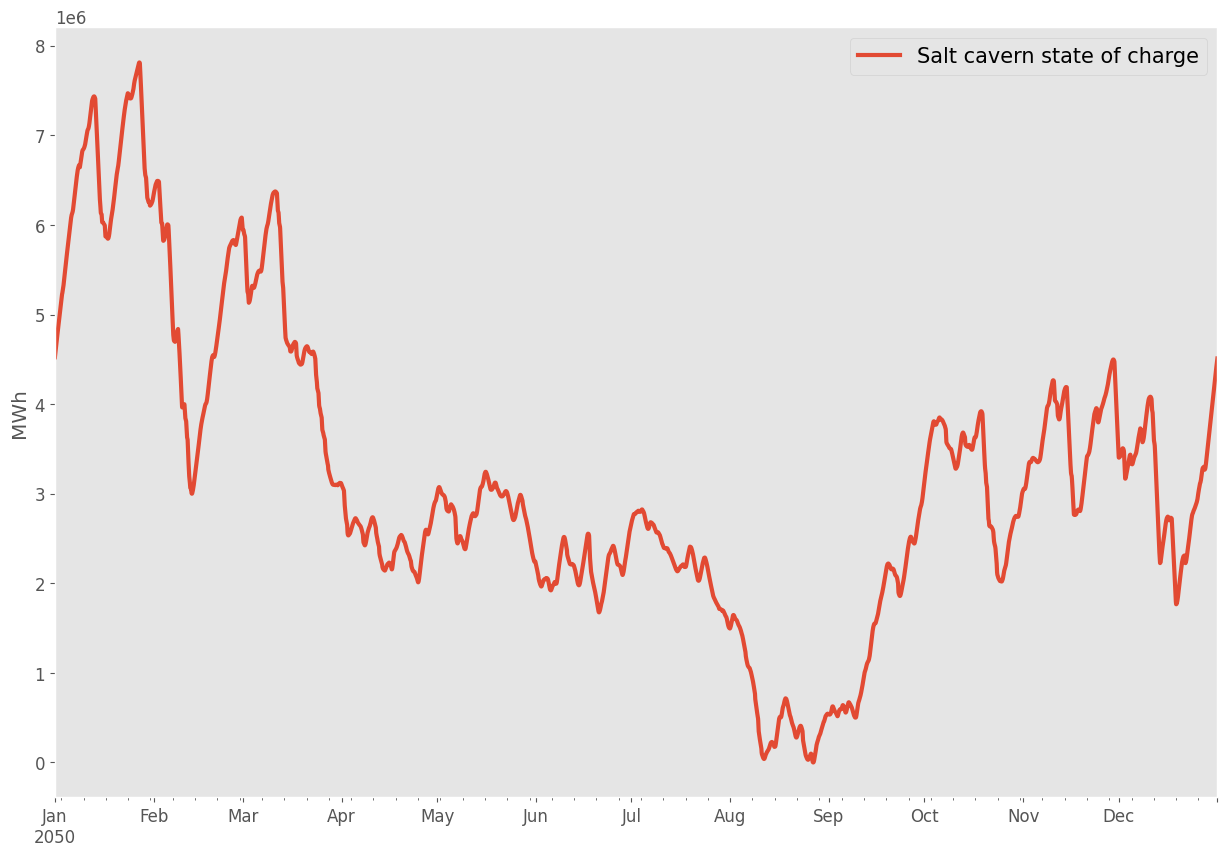

In [26]:
# Graph the storage state of charge and dispatch over the simulation period
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

state_of_charge.plot(label="Salt cavern state of charge", ax=ax, linewidth=3)

ax.legend(prop={'size': 15})
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## 4. Plot Line Loading

### 4.1 Mean Loads

In [27]:
# Get mean generator capacity by bus and carrier:

load = network.loads.assign(g=network.loads_t.p.mean()).groupby(["bus"]).g.sum()
flow = pd.Series(10, index=network.branches().index)
load

bus
Bacton           2093.887673
Barrow              0.000000
Grain LNG         366.541462
Grangemouth      2081.189369
Humberside       2945.943713
Merseyside        581.539497
South Wales       462.224882
Southampton       290.732107
St Fergus        1903.588530
Teesside         1982.674722
Theddlethorpe     205.070309
Name: g, dtype: float64

C:\Users\tatya\Documents\anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


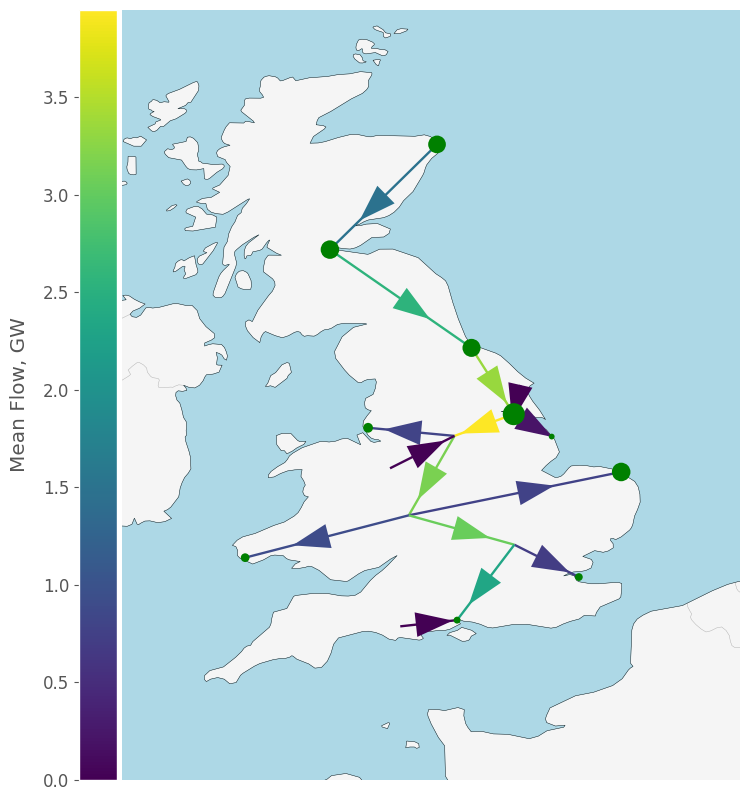

In [28]:
# Plot graph:

plt.rcParams.update({'font.size': 12})

plt.rc('figure', figsize=(15,10))

collection = network.plot(
    bus_sizes=load / 1e5,
    bus_colors='green',
    margin=0.3,
    flow=flow,
    link_widths=1.7,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
    link_colors=network.links_t.p0.mean().abs() / 1e3)

cbar=plt.colorbar(collection[2], fraction=0.04, pad=0.004, location='left')

cbar.set_label('Mean Flow, GW', labelpad=10, loc='center', rotation=90)

plt.show()

### 4.2 Peak Loads

In [29]:
# Get mean generator capacity by bus and carrier:

load = network.loads.assign(g=network.loads_t.p.max()).groupby(["bus"]).g.sum()
flow = pd.Series(10, index=network.branches().index)
load

bus
Bacton           4943.465480
Barrow              0.000000
Grain LNG        3988.187575
Grangemouth      2200.062887
Humberside       7249.945718
Merseyside       4735.928715
South Wales      5261.877336
Southampton      3438.464967
St Fergus        5718.930154
Teesside         2068.915015
Theddlethorpe    2135.930199
Name: g, dtype: float64

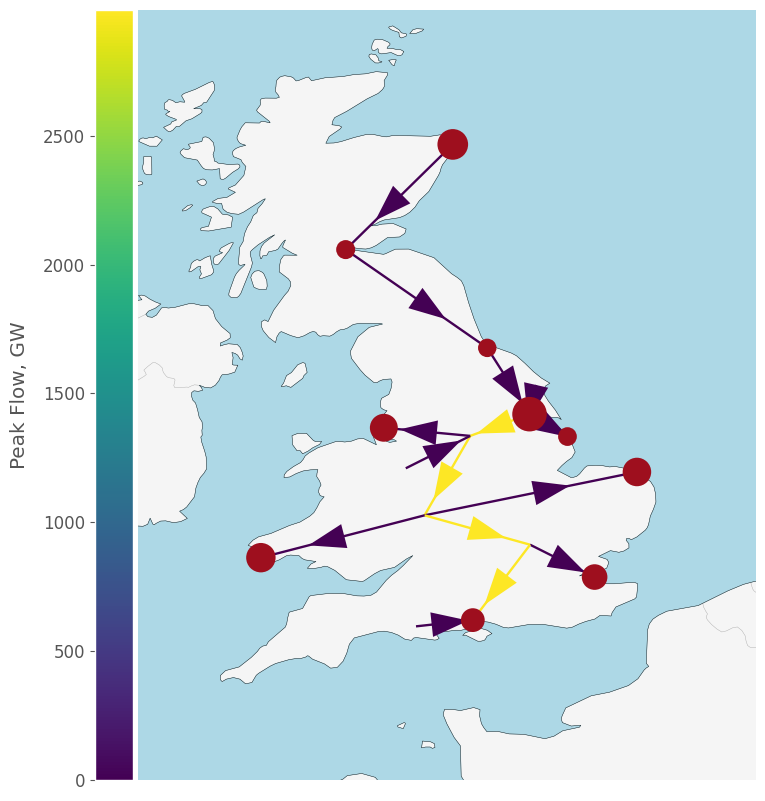

In [30]:
# Plot graph:

plt.rcParams.update({'font.size': 12})

plt.rc('figure', figsize=(15,10))

collection = network.plot(
    bus_sizes=load / 1e5,
    bus_colors='#9E0F1E',
    margin=0.3,
    flow=flow,
    link_widths=1.7,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
    link_colors=network.links_t.p0.max().abs() / 1e3)

cbar=plt.colorbar(collection[2], fraction=0.04, pad=0.004, location='left')

cbar.set_label('Peak Flow, GW', labelpad=10, loc='center', rotation=90)

plt.show()

In [31]:
# network.links_t.p0.mean().abs().to_csv('1a-output\p_links_mean.csv', index=True)

In [32]:
# network.links_t.p0.max().abs().to_csv('1a-output\p_links_max.csv', index=True)

In [33]:
# network.links_t.p0.min().abs().to_csv('1a-output\p_links_min.csv', index=True)